## Tarea 2 Análisis de Datos
### Outliers en cuarentenas
#### Martín Marchant en colaboración con Manuel Muñoz

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [121]:
casos = pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',')

In [122]:
casosLC = casos[casos["Comuna"]== "Las Condes"] #filtrar por Las Condes
casosLC.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-01,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,Tasa
108,Metropolitana,13,Las Condes,13114.0,330759.0,181.0,208.0,224.0,258.0,266.0,...,21238.0,21394.0,21589.0,21754.0,21847.0,21967.0,22028.0,22122.0,22160.0,6699.7


In [123]:
casos1 = casosLC.melt(id_vars=["Region","Codigo region", "Comuna","Codigo comuna","Poblacion", "Tasa"], var_name="Fecha", value_name="Casos") #dar vuelta las fechas

In [124]:
casos1.drop('Codigo region', axis=1, inplace=True) #borrar columnas

In [125]:
casos1.drop('Codigo comuna', axis=1, inplace=True)  #borrar columnas

In [126]:
casos1.drop('Poblacion', axis=1, inplace=True) #borrar columnas

In [127]:
casos1.drop('Tasa', axis=1, inplace=True) #borrar columnas

In [128]:
casos1['Fecha'] = pd.to_datetime(casos1['Fecha']) #formato fecha

In [129]:
casos2= casos1.groupby('Comuna').resample('W-Mon', on='Fecha').sum().reset_index().sort_values(by='Fecha') #Semanalmente

In [130]:
casos2

,Comuna,Fecha,Casos
0,Las Condes,2020-03-30,181.0
1,Las Condes,2020-04-06,690.0
2,Las Condes,2020-04-13,843.0
3,Las Condes,2020-04-20,952.0
4,Las Condes,2020-04-27,701.0
...,...,...,...
83,Las Condes,2021-11-01,42342.0
84,Las Condes,2021-11-08,42983.0
85,Las Condes,2021-11-15,43601.0
86,Las Condes,2021-11-22,43995.0


In [131]:
casos2["Casos_Sem"] = casos2["Casos"]-casos2["Casos"].shift() #resta el valor anterior para que no se acumulen los casos

In [132]:
casos2

,Comuna,Fecha,Casos,Casos_Sem
0,Las Condes,2020-03-30,181.0,NaN
1,Las Condes,2020-04-06,690.0,509.0
2,Las Condes,2020-04-13,843.0,153.0
3,Las Condes,2020-04-20,952.0,109.0
4,Las Condes,2020-04-27,701.0,-251.0
...,...,...,...,...
83,Las Condes,2021-11-01,42342.0,793.0
84,Las Condes,2021-11-08,42983.0,641.0
85,Las Condes,2021-11-15,43601.0,618.0
86,Las Condes,2021-11-22,43995.0,394.0


In [133]:
casos3 = casos2[casos2["Casos_Sem"] > 0].reset_index() #sacar negativos
casos3.drop('index', axis=1, inplace=True)

In [134]:
casos3.drop('Casos', axis=1, inplace=True) #borrar columna casos
casos3

,Comuna,Fecha,Casos_Sem
0,Las Condes,2020-04-06,509.0
1,Las Condes,2020-04-13,153.0
2,Las Condes,2020-04-20,109.0
3,Las Condes,2020-05-04,185.0
4,Las Condes,2020-05-11,478.0
...,...,...,...
80,Las Condes,2021-11-01,793.0
81,Las Condes,2021-11-08,641.0
82,Las Condes,2021-11-15,618.0
83,Las Condes,2021-11-22,394.0


<AxesSubplot:xlabel='Fecha', ylabel='Casos_Sem'>

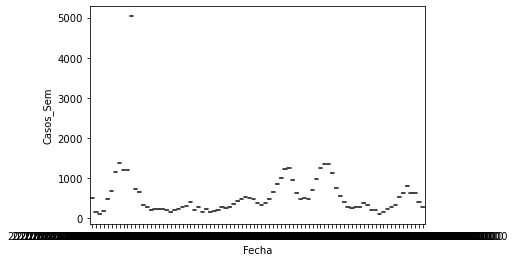

In [135]:
sns.boxplot(x="Fecha", y="Casos_Sem", data=casos3)

<AxesSubplot:xlabel='Fecha', ylabel='Casos_Sem'>

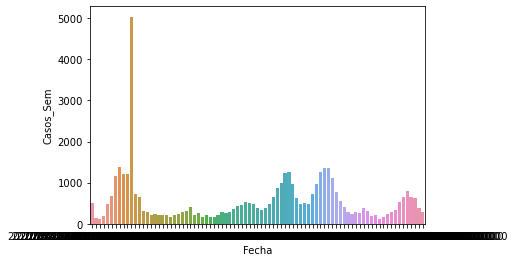

In [136]:
sns.barplot(x="Fecha", y="Casos_Sem", data=casos3)

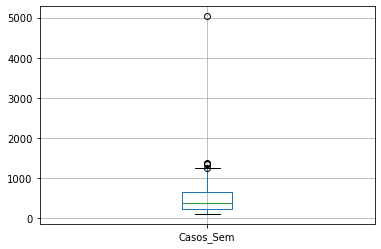

In [137]:
OutliersLC = casos3.boxplot(column = ["Casos_Sem"])

In [138]:
Outliers_Las_Condes= casos3[casos3["Casos_Sem"]> 1350]
Outliers_Las_Condes

,Comuna,Fecha,Casos_Sem
7,Las Condes,2020-06-01,1373.0
10,Las Condes,2020-06-29,5033.0
60,Las Condes,2021-06-14,1352.0


<AxesSubplot:xlabel='Fecha', ylabel='Casos_Sem'>

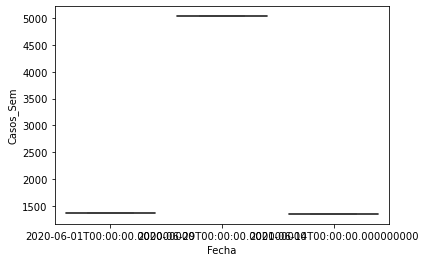

In [139]:
sns.boxplot(x="Fecha", y="Casos_Sem", data=Outliers_Las_Condes)

En la tabla"Outliers_Las_Condes" se muestran los outliers para Las Condes junto con gráficos.
Se consideraron como outliers las semanas con igual o más de 1350 casos en Las Condes.